In [2]:
import random
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [3]:
df = pd.read_csv("cluster_data.csv")
X = df["Feature 1"]
Y = df["Feature 2"]

In [4]:
df

,Feature 1,Feature 2
0,2.698582,-0.672960
1,-0.128113,4.355952
2,2.509049,5.773146
3,-1.518276,3.444886
4,-0.072283,2.883769
...,...,...
495,10.303693,-4.378493
496,-0.730000,6.254563
497,-3.478708,2.257991
498,-2.081214,2.447245


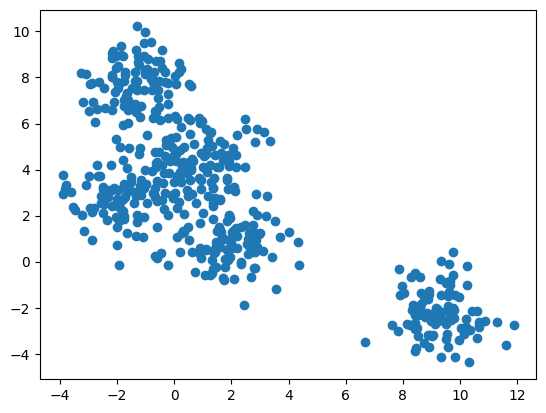

In [5]:
plt.scatter(X, Y)

In [6]:
class Point:
    def __init__(self, x, y):
        self.x = x
        self.y = y
    
    def __repr__(self): # For cleaner representation
        return f"({self.x}, {self.y})"

In [7]:
def Distance(P1, P2):
    ### Enter Code to find distance between 2 points
    return np.sqrt((P2.x - P1.x)**2 + (P2.y - P1.y)**2)

def Mean(AP):
    ### Write code to find centroid of an group of points
    cx = sum(point.x for point in AP) / len(AP) if len(AP) != 0 else 0
    cy = sum(point.y for point in AP) / len(AP) if len(AP) != 0 else 0
    centroid = Point(cx, cy)
    return centroid

In [8]:
def MinPoint(P, AP):
    ### To find the group a point P belongs to given centroids AP
    minD = Distance(P, AP[0])
    minId = 0
    for i in range(1, len(AP)):
        if Distance(P, AP[i]) < minD:
            minD = Distance(P, AP[i])
            minId = i

    return AP[minId]

In [9]:
def equality(A1, A2):
    ### Check if A1 and A2 arrays are same or not(same values)
    if len(A1) != len(A2):
        return False
    for i in range(len(A1)):
        if (A1[i].x != A2[i].x or A1[i].y != A2[i].y):
            return False
    return True

In [10]:
def kMeans(X, Y, k):
    ### kM is the final list of k-Centroids, kMi is initial chosen random points(choose random k points from dataset), and D is dictionary of the groups, {Centroid : [Points in group]}
    randomIds = np.random.randint(0, len(X), k)
    kMi = []
    for index in randomIds:
        kMi.append(Point(X[index], Y[index]))

    kM = kMi
    flag = True
    while(flag):
        D = dict()  # Dictionary
        for centroid in kM:
            D[centroid] = list()
        
        for i in range(len(X)):
            point = Point(X[i], Y[i])
            D[MinPoint(point, kM)].append(point)
        
        temp_centroid_list = list()
        for i, centroid in enumerate(kM):
            temp_centroid_list.append(Mean(D[centroid]))

        if(equality(kM, temp_centroid_list)):
            flag = False
        else:
            kM = temp_centroid_list
            
    return [kM, kMi, D]

In [11]:
def sumSqDist(kM, D):
    distSum = 0
    for i in range(len(kM)):
        points = D[kM[i]]
        for point in points:
            distSum += Distance(kM[i], point)
    return distSum / len(kM)

def Elbow(X, Y, kmax):
    ### For 1 to a reasonable value, find out Sum squared distance to centroid/k, and list out in an array to find optimal k using Elbow method
    lowestDist = 1e5
    kList = []
    for k in range(1, kmax+1):
        kM, kMi, D = kMeans(X, Y, k)
        kList.append(sumSqDist(kM, D))
    
    return kList


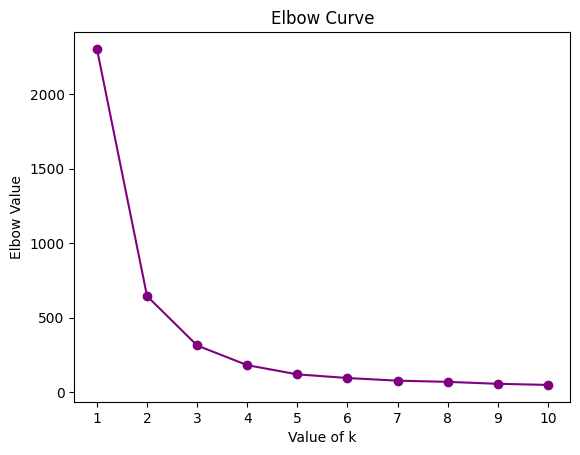

In [14]:
### Here, plot the elbow curve
kmax = 10
elbow = Elbow(X, Y, kmax)
plt.plot(np.arange(1, kmax+1), elbow, marker = 'o', color='purple')
plt.xticks(np.arange(1, kmax+1))
plt.xlabel("Value of k")
plt.ylabel("Elbow Value")
plt.title('Elbow Curve')
plt.show()

Plotting the Scatter plot

In [15]:
k = 3
hexadecimal_alphabets = '0123456789ABCDEF'
color = ["#" + ''.join([random.choice(hexadecimal_alphabets) for j in range(6)]) for i in range(k)]

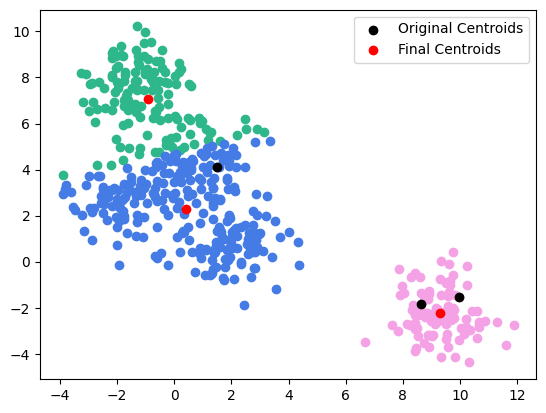

In [16]:
### Here, plot the scatter plot with each point colour coded with the respective groups. And, with initial k centroids, and final k centroids
kM, kMi, D = kMeans(X, Y, k)

for i in range(k):
    for point in D[kM[i]]:
        plt.scatter(point.x, point.y, c=color[i])

oX, oY = list(), list()
nX, nY = list(), list()

for i in range(k):
    oX.append(kMi[i].x)
    oY.append(kMi[i].y)
    nX.append(kM[i].x)
    nY.append(kM[i].y)
    
plt.scatter(oX, oY, color="black", label = "Original Centroids")
plt.scatter(nX, nY, color="red", label = "Final Centroids")
plt.legend()
plt.show()